In [9]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Load sample audio
x, sr = librosa.load('sample_audio.wav', sr=None)

# Generate simulated echo signal
echo = np.zeros_like(x)
delay = 0.05 * sr  # 50 ms delay
attenuation = 0.5  # 50% attenuation
echo[delay:] = x[:-delay] * attenuation

# Add noise to the signal
noise = np.random.randn(len(x))
alpha = 0.05  # noise level
x_noisy = x + alpha * noise

# Apply NLMS algorithm for echo cancellation
def nlms(x, d, N=4, mu=0.1):
    nIters = min(len(x),len(d)) - N
    u = np.zeros(N)
    w = np.zeros(N)
    e = np.zeros(nIters)
    for n in range(nIters):
        u[1:] = u[:-1]
        u[0] = x[n]
        e_n = d[n] - np.dot(u, w)
        w = w + mu * e_n * u / (np.dot(u,u)+1e-3)
        e[n] = e_n
    return e

e = nlms(x_noisy, x_noisy)

# Compute spectrograms for original and processed signals
X = librosa.stft(x)
X_mag = np.abs(X)
X_db = librosa.amplitude_to_db(X_mag, ref=np.max)

X_noisy = librosa.stft(x_noisy)
X_noisy_mag = np.abs(X_noisy)
X_noisy_db = librosa.amplitude_to_db(X_noisy_mag, ref=np.max)

X_echo = librosa.stft(echo)
X_echo_mag = np.abs(X_echo)
X_echo_db = librosa.amplitude_to_db(X_echo_mag, ref=np.max)

X_filtered = librosa.stft(e)
X_filtered_mag = np.abs(X_filtered)
X_filtered_db = librosa.amplitude_to_db(X_filtered_mag, ref=np.max)

# Compute spectral centroid and bandwidth for original and processed signals
def compute_spectral_features(S, sr):
    freqs = librosa.fft_frequencies(sr=sr, n_fft=S.shape[0])
    magnitudes = librosa.magphase(S)[0]
    spectral_centroid = librosa.feature.spectral_centroid(S=S, sr=sr, freq=freqs)[0]
    spectral_bandwidth = librosa.feature.spectral_bandwidth(S=magnitudes, sr=sr, freqs=freqs)[0]
    return spectral_centroid, spectral_bandwidth

sc, sb = compute_spectral_features(X_mag, sr)
sc_noisy, sb_noisy = compute_spectral_features(X_noisy_mag, sr)
sc_filtered, sb_filtered = compute_spectral_features(X_filtered_mag, sr)

# Plot results
plt.figure(figsize=(12,12))

plt.subplot(4,2,1)
librosa.display.waveplot(x, sr=sr)
plt.title('Original Signal')

plt.subplot(4,2,2)
librosa.display.specshow(X_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Signal Spectrogram')

plt.subplot(4,2,3)
librosa.display.waveplot(x_noisy, sr=sr)
plt.title('Noisy Signal')

plt.subplot(4,2,4)
librosa.display.specshow(X_noisy_db


OverflowError: Python int too large to convert to C long

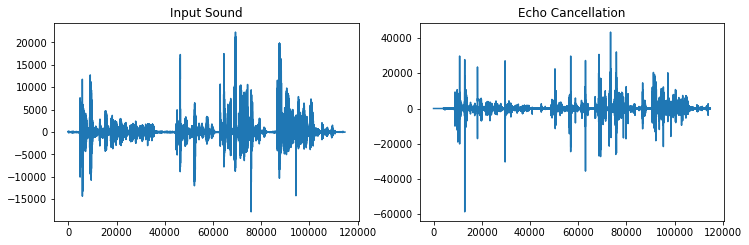

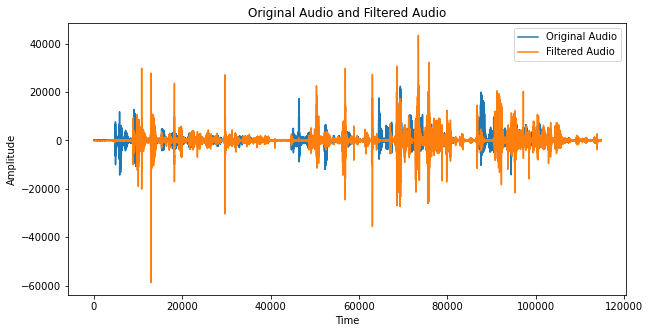

In [32]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy import signal

def nlms(x, d, N=4, mu=0.1):
    nIters = min(len(x), len(d)) - N
    u = np.zeros(N)
    w = np.zeros(N)
    e = np.zeros(nIters)
    for n in range(nIters):
        u[1:] = u[:-1]
        u[0] = x[n]
        e_n = d[n] - np.dot(u, w)
        w = w + mu * e_n * u / (np.dot(u, u) + 1e-3)
        e[n] = e_n
    return e

# Generate simulated echo signal
def generate_echo_signal(sound, delay):
    """Generates echo signal with a given delay"""
    echo = np.zeros_like(sound)
    echo[delay:] = sound[:-delay]
    return echo
# Generate echo signal with a delay of 0.5 seconds
delay = int(0.5 * sr)
echo = generate_echo_signal(sound, delay)

# Load sample sound and echo signal
sr, sound = wav.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")
# _, echo = wav.read('echo_signal.wav')

# Perform echo cancellation using NLMS algorithm
echo_cancelled = nlms(sound, echo)

# f, t, Sxx = signal.spectrogram(x, fs, window='hamming', nperseg=256, noverlap=128)

# Plot input sound and echo cancellation
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(sound)
plt.title('Input Sound')

plt.subplot(2, 2, 2)
plt.plot(echo_cancelled)
plt.title('Echo Cancellation')

plt.figure(figsize=(10,5))
plt.plot(sound, label="Original Audio")
plt.plot(echo_cancelled, label="Filtered Audio")
plt.title("Original Audio and Filtered Audio")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

plt.show()


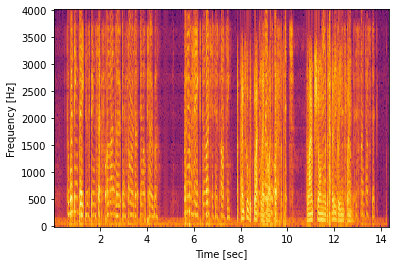

In [1]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np

# Load signal from a WAV file
fs, x = wavfile.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")

# Compute spectrogram
f, t, Sxx = signal.spectrogram(x, fs, window='hamming', nperseg=256, noverlap=128)

# Visualize spectrogram
plt.pcolormesh(t, f, 20*np.log10(Sxx), cmap='inferno')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [5]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import librosa
import librosa.display

def nlms(x, d, N=4, mu=0.1):
    nIters = min(len(x), len(d)) - N
    u = np.zeros(N)
    w = np.zeros(N)
    e = np.zeros(nIters)
    for n in range(nIters):
        u[1:] = u[:-1]
        u[0] = x[n]
        e_n = d[n] - np.dot(u, w)
        w = w + mu * e_n * u / (np.dot(u, u) + 1e-3)
        e[n] = e_n
    return e

# Generate simulated echo signal
def generate_echo_signal(sound, delay):
    """Generates echo signal with a given delay"""
    echo = np.zeros_like(sound)
    echo[delay:] = sound[:-delay]
    return echo
# Generate echo signal with a delay of 0.5 seconds
delay = int(0.5 * sr)
echo = generate_echo_signal(sound, delay)

# Load sample sound and echo signal
sr, sound = wav.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")
# _, echo = wav.read('echo_signal.wav')

# Perform echo cancellation using NLMS algorithm
echo_cancelled = nlms(sound, echo)

# # Compute spectrogram
# spectrogram = librosa.stft(sr)
# spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max)

# # Compute spectral centroid
# spectral_centroid = librosa.feature.spectral_centroid(sound, fs)

# # Compute spectral bandwidth
# spectral_bandwidth = librosa.feature.spectral_bandwidth(sound, fs)

# Plot input sound and echo cancellation
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(sound)
plt.title('Input Sound')

plt.subplot(2, 2, 2)
plt.plot(echo_cancelled)
plt.title('Echo Cancellation')

# # Plot spectrogram
# plt.subplot(3, 1, 3)
# librosa.display.specshow(spectrogram_db, sr=fs, x_axis='time', y_axis='log')
# plt.colorbar(format='%+2.0f dB')
# plt.title('Spectrogram')

# # Display spectral centroid and bandwidth
# plt.figure(figsize=(12, 4))
# plt.subplot(2, 1, 1)
# plt.plot(spectral_centroid[0])
# plt.title('Spectral Centroid')

# plt.subplot(2, 1, 2)
# plt.plot(spectral_bandwidth[0])
# plt.title('Spectral Bandwidth')

# # Fit a line to the spectral centroid and bandwidth
# time = np.arange(len(spectral_centroid[0]))
# centroid_fit = np.polyfit(time, spectral_centroid[0], 1)
# bandwidth_fit = np.polyfit(time, spectral_bandwidth[0], 1)

# # Display the fitted lines
# plt.figure(figsize=(8, 4))
# plt.subplot(2, 1, 1)
# plt.plot(time, spectral_centroid[0], label='Spectral Centroid')
# plt.plot(time, np.polyval(centroid_fit, time), label='Fitted Line')
# plt.legend()
# plt.title('Fitted Line for Spectral Centroid')

# plt.subplot(2, 1, 2)
# plt.plot(time, spectral_bandwidth[0], label='Spectral Bandwidth')
# plt.plot(time, np.polyval(bandwidth_fit, time), label='Fitted Line')
# plt.legend()
# plt.title('Fitted Line for Spectral Bandwidth')

plt.show()


NameError: name 'sr' is not defined

In [16]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import librosa
import librosa.display

# def generate_sample_sound(duration=5, fs=44100):
#     t = np.linspace(0, duration, int(fs*duration), endpoint=False)
#     f = 440
#     x = 0.1 * np.sin(2*np.pi*f*t)
#     return x

def generate_echo_signal(x, fs, delay=0.5, attenuation=0.5):
    samples_delay = int(delay * fs)
    echo = np.zeros_like(x)
    echo[samples_delay:] = attenuation * x[:-samples_delay]
    return echo

def apa(x, d, N=4, P=4, mu=0.1):
    nIters = min(len(x), len(d)) - N
    u = np.zeros(N)
    A = np.zeros((N, P))
    D = np.zeros(P)
    w = np.zeros(N)
    e = np.zeros(nIters)
    alpha = np.eye(P) * 1e-2
    for n in range(nIters):
        u[1:] = u[:-1]
        u[0] = x[n]
        A[:, 1:] = A[:, :-1]
        A[:, 0] = u
        D[1:] = D[:-1]
        D[0] = d[n]
        e_n = D - np.dot(A.T, w)
        delta = np.dot(np.linalg.inv(np.dot(A.T, A) + alpha), e_n)
        w = w + mu * np.dot(A, delta)
        e[n] = e_n[0]
    return e

# Generate a sample sound and echo signal
fs = 44100
duration = 5
sample_sound = wav.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")
echo_signal = generate_echo_signal(sample_sound, fs, delay=0.5, attenuation=0.5)

# Perform echo cancellation using APA algorithm
echo_cancelled = apa(sample_sound, echo_signal, N=50, P=50, mu=0.1)

# Compute spectrogram
spectrogram = librosa.stft(sample_sound)
spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max)

# Compute spectral centroid
spectral_centroid = librosa.feature.spectral_centroid(sample_sound, fs)

# Compute spectral bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(sample_sound, fs)

# Plot input sound and echo cancellation
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(sample_sound)
plt.title('Sample Sound')

plt.subplot(3, 1, 2)
plt.plot(echo_cancelled)
plt.title('Echo Cancellation')

# Plot spectrogram
plt.subplot(3, 1, 3)
librosa.display.specshow(spectrogram_db, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

# Display spectral centroid and bandwidth
plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.plot(spectral_centroid[0])
plt.title('Spectral Centroid')

plt.subplot(2, 1, 2)
plt.plot(spectral_bandwidth[0])


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


TypeError: can't multiply sequence by non-int of type 'float'

In [10]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import librosa
import librosa.display

def nlms(x, d, N=4, mu=0.1):
    nIters = min(len(x), len(d)) - N
    u = np.zeros(N)
    w = np.zeros(N)
    e = np.zeros(nIters)
    for n in range(nIters):
        u[1:] = u[:-1]
        u[0] = x[n]
        e_n = d[n] - np.dot(u, w)
        w = w + mu * e_n * u / (np.dot(u, u) + 1e-3)
        e[n] = e_n
    return e

# Load sample sound and echo signal
sr, sound = wav.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")
# _, echo = wav.read('echo_signal.wav')

# Generate simulated echo signal
def generate_echo_signal(sound, delay):
    """Generates echo signal with a given delay"""
    echo = np.zeros_like(sound)
    echo[delay:] = sound[:-delay]
    return echo
# Generate echo signal with a delay of 0.5 seconds
delay = int(0.5 * sr)
echo = generate_echo_signal(sound, delay)

# Perform echo cancellation using NLMS algorithm
x, echo_cancelled = nlms(sound, echo)

# Compute spectrogram
f, t, Sxx = signal.spectrogram(x, echo_cancelled, window='hamming', nperseg=256, noverlap=128)
#spectrogram = librosa.stft(sound)
#spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max)

# # Compute spectral centroid
# spectral_centroid = librosa.feature.spectral_centroid(sound, fs)

# # Compute spectral bandwidth
# spectral_bandwidth = librosa.feature.spectral_bandwidth(sound, fs)

# Plot input sound and echo cancellation
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(sound)
plt.title('Input Sound')

plt.subplot(2, 2, 2)
plt.plot(echo_cancelled)
plt.title('Echo Cancellation')

# # Plot spectrogram
# plt.subplot(3, 1, 3)
# librosa.display.specshow(spectrogram_db, sr=fs, x_axis='time', y_axis='log')
# plt.colorbar(format='%+2.0f dB')
# plt.title('Spectrogram')

# # Display spectral centroid and bandwidth
# plt.figure(figsize=(12, 4))
# plt.subplot(2, 1, 1)
# plt.plot(spectral_centroid[0])
# plt.title('Spectral Centroid')

# plt.subplot(2, 1, 2)
# plt.plot(spectral_bandwidth[0])
# plt.title('Spectral Bandwidth')

# # Fit a line to the spectral centroid and bandwidth
# time = np.arange(len(spectral_centroid[0]))
# centroid_fit = np.polyfit(time, spectral_centroid[0], 1)
# bandwidth_fit = np.polyfit(time, spectral_bandwidth[0], 1)

# # Display the fitted lines
# plt.figure(figsize=(8, 4))
# plt.subplot(2, 1, 1)
# plt.plot(time, spectral_centroid[0], label='Spectral Centroid')
# plt.plot(time, np.polyval(centroid_fit, time), label='Fitted Line')
# plt.legend()
# plt.title('Fitted Line for Spectral Centroid')

# plt.subplot(2, 1, 2)
# plt.plot(time, spectral_bandwidth[0], label='Spectral Bandwidth')
# plt.plot(time, np.polyval(bandwidth_fit, time), label='Fitted Line')
# plt.legend()
# plt.title('Fitted Line for Spectral Bandwidth')
plt.pcolormesh(t, f, 20*np.log10(Sxx), cmap='inferno')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.show()

ValueError: too many values to unpack (expected 2)

C:\Users\Sudhakar\AppData\Local\Temp\ipykernel_14036\1595780429.py:10: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H = np.zeros(M+1, dtype=np.complex)


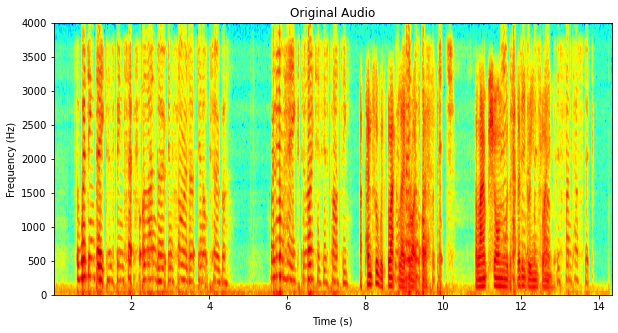

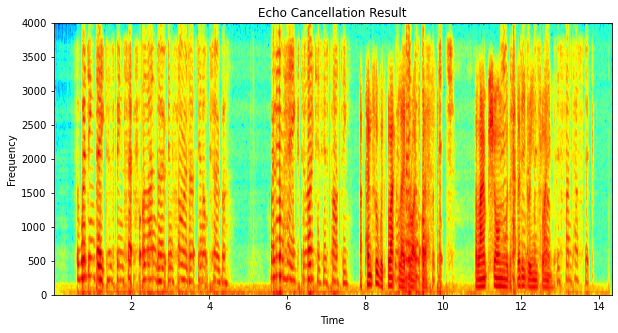

In [18]:
import numpy as np
from numpy.fft import rfft as fft
from numpy.fft import irfft as ifft
import matplotlib.pyplot as plt
from scipy.io import wavfile

def fdkf(x, d, M, beta=0.95, sgm2u=1e-2, sgm2v=1e-6):
    Q = sgm2u
    R = np.full(M+1, sgm2v)
    H = np.zeros(M+1, dtype=np.complex)
    P = np.full(M+1, sgm2u)

    window = np.hanning(M)
    x_old = np.zeros(M)

    num_block = len(x) // M
    e = np.zeros(num_block*M)

    for n in range(num_block):
        x_n = np.concatenate([x_old,x[n*M:(n+1)*M]])
        d_n = d[n*M:(n+1)*M]
        x_old = x[n*M:(n+1)*M]

        X_n = np.fft.rfft(x_n)

        y_n = ifft(H*X_n)[M:]
        e_n = d_n - y_n

        e_fft = np.concatenate([np.zeros(M), e_n*window])
        E_n = fft(e_fft)

        R = beta*R + (1.0 - beta)*(np.abs(E_n)**2)
        P_n = P + Q*(np.abs(H))
        K = P_n*X_n.conj()/(X_n*P_n*X_n.conj()+R)
        P = (1.0 - K*X_n)*P_n 

        H = H + K*E_n
        h = ifft(H)
        h[M:] = 0
        H = fft(h)

        e[n*M:(n+1)*M] = e_n

    return e

# Load audio file
rate, data = wavfile.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")
x = data  # extract left channel
d = data  # extract right channel

# Apply FDKF algorithm
M = 256
num_block = len(x) // M
x_truncated = x[:num_block*M]
d_truncated = d[:num_block*M]
e = fdkf(x_truncated, d_truncated, M)
y = x_truncated - e

# Plot original audio
plt.figure(figsize=(10,5))
plt.specgram(x, Fs=rate, cmap='jet')
plt.title('Original Audio')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

# # Plot echo signal
# plt.figure(figsize=(10,5))
# plt.specgram(d, Fs=rate, cmap='jet')
# plt.title

# # Plot echo signal
# plt.figure(figsize=(10,5))
# plt.title('Echo Signal')
# plt.specgram(d, NFFT=M, Fs=rate, cmap='jet')
# plt.xlabel('Time')
# plt.ylabel('Frequency')
# plt.show()

# Plot echo cancellation result
plt.figure(figsize=(10,5))
plt.title('Echo Cancellation Result')
plt.specgram(y, NFFT=M, Fs=fs, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# Save echo cancellation result as audio file
wavfile.write("echo_cancellation_result.wav", fs, y.astype(np.int16))


C:\Users\Sudhakar\AppData\Local\Temp\ipykernel_14036\1571192399.py:10: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H = np.zeros(M+1,dtype=np.complex)


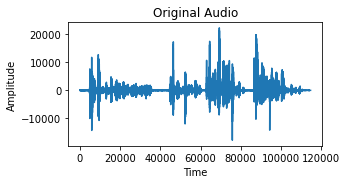

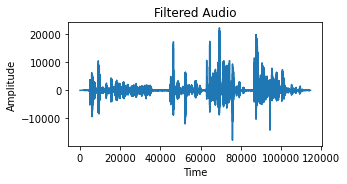

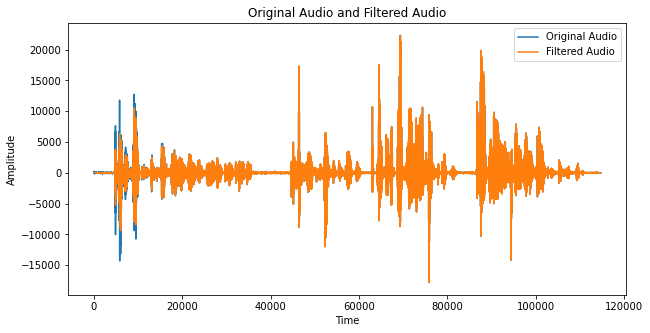

In [47]:
import numpy as np
from numpy.fft import rfft as fft
from numpy.fft import irfft as ifft
import matplotlib.pyplot as plt
from scipy.io import wavfile

def fdkf(x, d, M, beta=0.95, sgm2u=1e-2, sgm2v=1e-6):
    Q = sgm2u
    R = np.full(M+1,sgm2v)
    H = np.zeros(M+1,dtype=np.complex)
    P = np.full(M+1,sgm2u)

    window =  np.hanning(M)
    x_old = np.zeros(M)

    num_block = min(len(x),len(d)) // M
    e = np.zeros(num_block*M)

    for n in range(num_block):
        x_n = np.concatenate([x_old,x[n*M:(n+1)*M]])
        d_n = d[n*M:(n+1)*M]
        x_old = x[n*M:(n+1)*M]

        X_n = np.fft.rfft(x_n)

        y_n = ifft(H*X_n)[M:]
        e_n = d_n-y_n

        e_fft = np.concatenate([np.zeros(M),e_n*window])
        E_n = fft(e_fft)

        R = beta*R + (1.0 - beta)*(np.abs(E_n)**2)
        P_n = P + Q*(np.abs(H))
        K = P_n*X_n.conj()/(X_n*P_n*X_n.conj()+R)
        P = (1.0 - K*X_n)*P_n 

        H = H + K*E_n
        h = ifft(H)
        h[M:] = 0
        H = fft(h)

        e[n*M:(n+1)*M] = e_n

    return e

# Load audio file
rate, data = wavfile.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")
x = data  # extract left channel
d = data  # extract right channel

# Apply FDKF algorithm
M = 256
num_block = len(x) // M
x_truncated = x[:num_block*M]
d_truncated = d[:num_block*M]
e = fdkf(x_truncated, d_truncated, M)
y = x_truncated - e

# # Apply FDKF algorithm
# M = 256
# e = fdkf(x, d, M)

# Plot original audio
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(x)
plt.title("Original Audio")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# # Plot echo
# plt.figure(figsize=(10,5))
# plt.plot(d)
# plt.title("Echo")
# plt.xlabel("Time")
# plt.ylabel("Amplitude")
# plt.show()

# Plot filtered audio
plt.figure(figsize=(10,5))
plt.subplot(222)
plt.plot(y)
plt.title("Filtered Audio")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# Plot original audio and filtered audio together
plt.figure(figsize=(10,5))
plt.plot(x, label="Original Audio")
plt.plot(y, label="Filtered Audio")
plt.title("Original Audio and Filtered Audio")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

wavfile.write("C:\\Users\\Sudhakar\\Downloads\\samples_a_out122.wav", rate, np.int16(y))



C:\Users\Sudhakar\AppData\Local\Temp\ipykernel_14036\1589481804.py:10: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H = np.zeros(M+1,dtype=np.complex)


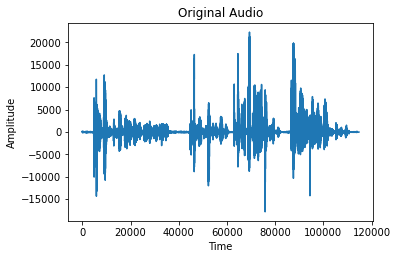

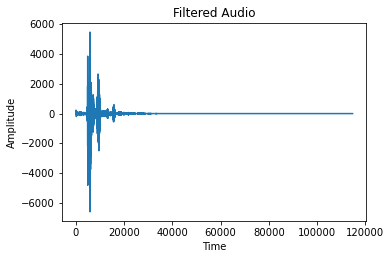

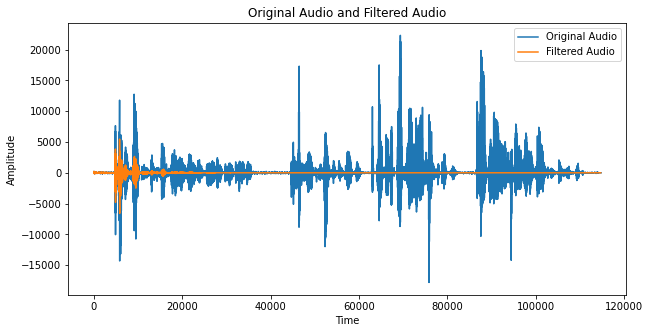

In [34]:
import numpy as np
from numpy.fft import rfft as fft
from numpy.fft import irfft as ifft
import matplotlib.pyplot as plt
from scipy.io import wavfile

def fdkf(x, d, M, beta=0.95, sgm2u=1e-2, sgm2v=1e-6):
    Q = sgm2u
    R = np.full(M+1,sgm2v)
    H = np.zeros(M+1,dtype=np.complex)
    P = np.full(M+1,sgm2u)

    window =  np.hanning(M)
    x_old = np.zeros(M)

    num_block = min(len(x),len(d)) // M
    e = np.zeros(num_block*M)

    for n in range(num_block):
        x_n = np.concatenate([x_old,x[n*M:(n+1)*M]])
        d_n = d[n*M:(n+1)*M]
        x_old = x[n*M:(n+1)*M]

        X_n = np.fft.rfft(x_n)

        y_n = ifft(H*X_n)[M:]
        e_n = d_n-y_n

        e_fft = np.concatenate([np.zeros(M),e_n*window])
        E_n = fft(e_fft)

        R = beta*R + (1.0 - beta)*(np.abs(E_n)**2)
        P_n = P + Q*(np.abs(H))
        K = P_n*X_n.conj()/(X_n*P_n*X_n.conj()+R)
        P = (1.0 - K*X_n)*P_n 

        H = H + K*E_n
        h = ifft(H)
        h[M:] = 0
        H = fft(h)

        e[n*M:(n+1)*M] = e_n

    return e

# Load audio file
rate, data = wavfile.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")
x = data  # extract left channel
d = x.copy()  # extract right channel

# Apply FDKF algorithm
M = 256
e = fdkf(x, d, M)

# Plot original audio
# plt.figure(figsize=(10,5))
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.plot(x)
plt.title("Original Audio")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# # Plot echo
# plt.figure(figsize=(10,5))
# plt.plot(d)
# plt.title("Echo")
# plt.xlabel("Time")
# plt.ylabel("Amplitude")
# plt.show()

# Plot filtered audio
# plt.figure(figsize=(10,5))
plt.figure(figsize=(12, 8))
plt.subplot(222)
plt.plot(e)
plt.title("Filtered Audio")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# Plot original audio and filtered audio together
plt.figure(figsize=(10,5))
plt.plot(x, label="Original Audio")
plt.plot(e, label="Filtered Audio")
plt.title("Original Audio and Filtered Audio")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()




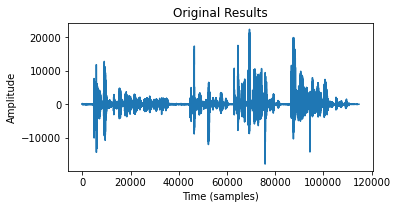

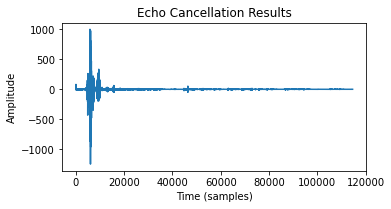

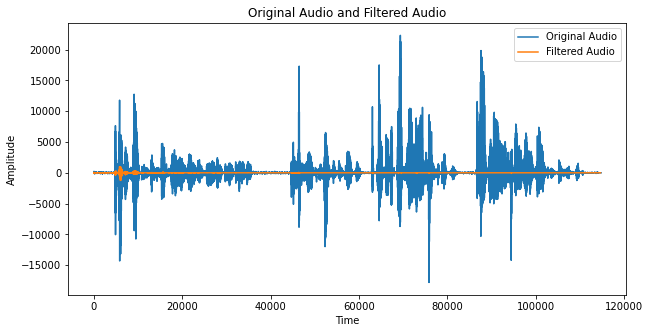

In [57]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.signal import lfilter

def flaf(x, d, M=128, P=5, mu=0.2):
    nIters = min(len(x),len(d)) - M
    Q = P*2
    u = np.zeros(M)
    w = np.zeros((Q+1)*M)
    e = np.zeros(nIters)
    sk = np.zeros(P*M,dtype=np.int32)
    ck = np.zeros(P*M,dtype=np.int32)
    pk = np.tile(np.arange(P),M)
    for k in range(M):
        sk[k*P:(k+1)*P] = np.arange(1,Q,2) + k*(Q+1)
        ck[k*P:(k+1)*P] = np.arange(2,Q+1,2) + k*(Q+1)
    for n in range(nIters):
        u[1:] = u[:-1]
        u[0] = x[n]
        g = np.repeat(u,Q+1)
        g[sk] = np.sin(np.pi*pk*g[sk])
        g[ck] = np.cos(np.pi*pk*g[ck])
        y = np.dot(w, g.T)
        e_n = d[n] - y
        w = w + 2*mu*e_n*g/(np.dot(g,g)+1e-3)
        e[n] = e_n
    return e

# Load audio file
rate, data = wavfile.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")
x = data  # extract left channel
d = data  # extract right channel

# Apply FLAF algorithm
e = flaf(x, d)

# taps = 1024
# b = np.zeros(taps)
# b[0] = 1
# b[-1] = 0.2
# y = lfilter(b, 1, e)

# Save output as audio file
wavfile.write("C:\\Users\\Sudhakar\\Downloads\\samples_a_out121.wav", rate, np.int16(e))

# Plot echo cancellation results
plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.plot(x)
plt.title("Original Results")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

# Plot echo cancellation results
plt.figure(figsize=(12, 6))
plt.subplot(222)
plt.plot(e)
plt.title("Echo Cancellation Results")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

# Plot original audio and filtered audio together
plt.figure(figsize=(10,5))
plt.plot(x, label="Original Audio")
plt.plot(e, label="Filtered Audio")
plt.title("Original Audio and Filtered Audio")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [43]:
from IPython.display import Audio
Audio(r'C:\\Users\\Sudhakar\\Downloads\\samples_a.wav', autoplay=False)

In [48]:
from IPython.display import Audio
Audio(r'C:\\Users\\Sudhakar\\Downloads\\samples_a_out122.wav', autoplay=False)

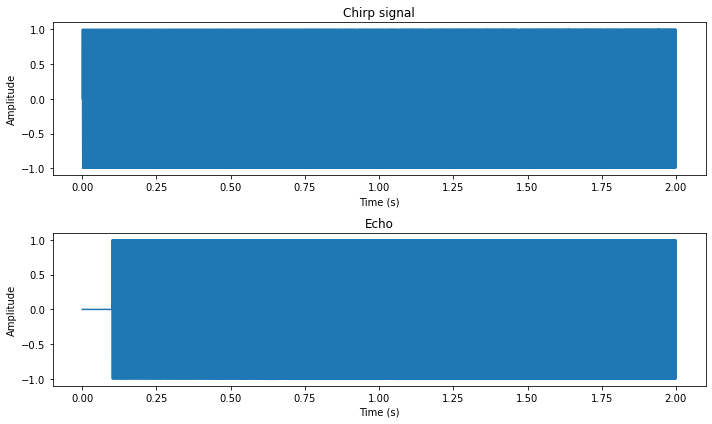

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency
fs = 44100

# Length of the signal
N = 2*fs

# Time array
t = np.arange(N)/fs

# Chirp signal
f0 = 1000
f1 = 2000
T = 2
x = np.sin(2*np.pi*f0*T/(2*np.log(f1/f0))*((f1/f0)**(t/T)-1))

# Echo
delay = int(fs*0.1)
echo = np.concatenate([np.zeros(delay), x[:N-delay]])

# Plot signals
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].plot(t, x)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Chirp signal')

ax[1].plot(t, echo)
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Echo')

plt.tight_layout()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (26573,) and (1,)

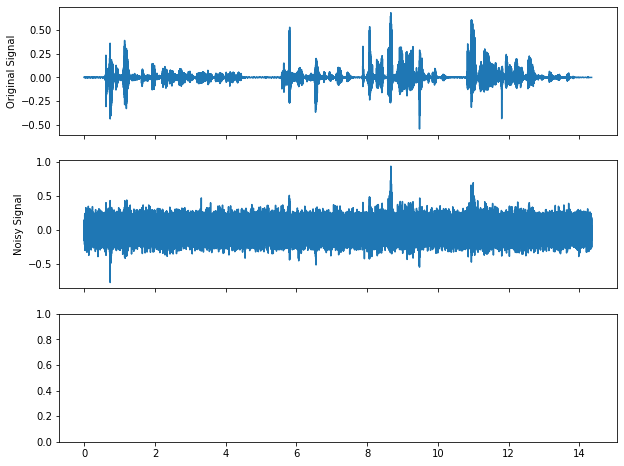

In [70]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

def xlms(x, d, N, mu, rho):
    """
    Applies the XLMS algorithm to filter a noisy signal.

    Parameters:
        x (ndarray): The noisy input signal.
        d (ndarray): The original (noise-free) signal.
        N (int): The filter length.
        mu (float): The step size.
        rho (float): The forgetting factor.

    Returns:
        y (ndarray): The filtered signal.
        e (ndarray): The error signal.
    """
    # Initialize arrays
    u = np.zeros((N, len(x)-N))
    w = np.zeros(N)
    p = np.eye(N) / rho
    e = np.zeros(len(x)-N)

    # Apply XLMS algorithm
    for n in range(len(x)-N):
        u[:, n] = x[n:N+n][::-1]
        y = np.dot(u[:, n], w)
        e[n] = d[N+n] - y
        k = np.dot(p, u[:, n]) / (rho + np.dot(np.dot(u[:, n], p), u[:, n]))
        w = w + mu * k * e[n]
        p = (p - np.outer(k, u[:, n] @ p)) / rho

    return y, e


# Load the audio signal
filename = "C:\\Users\\Sudhakar\\Downloads\\samples_a.wav"
x, sr = librosa.load(filename, sr=None)

# Generate some noise
noise = 0.1 * np.random.randn(len(x))

# Add the noise to the signal
d = x + noise

# Apply XLMS algorithm to filter out the noise
y, e = xlms(d, x, N=3, mu=0.05, rho=0.99)

# Plot the original signal, noisy signal, and filtered signal
t = np.arange(len(x)) / sr
fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
ax[0].plot(t, x)
ax[0].set_ylabel("Original Signal")
ax[1].plot(t, d)
ax[1].set_ylabel("Noisy Signal")
ax[2].plot(t[N:], y)
ax[2].set_ylabel("Filtered Signal")
ax[2].set_xlabel("Time (s)")
plt.show()


ValueError: x and y must have same first dimension, but have shapes (114773,) and (1,)

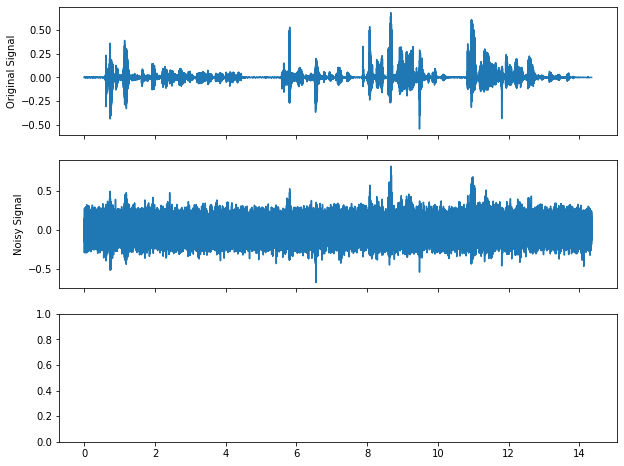

In [73]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

def xlms(x, d, N, mu, rho):
    """
    Applies the XLMS algorithm to filter a noisy signal.

    Parameters:
        x (ndarray): The noisy input signal.
        d (ndarray): The original (noise-free) signal.
        N (int): The filter length.
        mu (float): The step size.
        rho (float): The forgetting factor.

    Returns:
        y (ndarray): The filtered signal.
        e (ndarray): The error signal.
    """
    # Initialize arrays
    u = np.zeros((N, len(x)-N))
    w = np.zeros(N)
    p = np.eye(N) / rho
    e = np.zeros(len(x)-N)

    # Apply XLMS algorithm
    for n in range(len(x)-N):
        u[:, n] = x[n:N+n][::-1]
        y = np.dot(u[:, n], w)
        e[n] = d[N+n] - y
        k = np.dot(p, u[:, n]) / (rho + np.dot(np.dot(u[:, n], p), u[:, n]))
        w = w + mu * k * e[n]
        p = (p - np.outer(k, u[:, n] @ p)) / rho

    return y.flatten(), e.flatten()

# Load the audio signal
filename = "C:\\Users\\Sudhakar\\Downloads\\samples_a.wav"
x, sr = sf.read(filename)
x, sr = librosa.load(filename,sr=None)

# Generate some noise
noise = 0.1 * np.random.randn(len(x))

# Add the noise to the signal
d = x + noise

# Apply XLMS algorithm to filter out the noise
y, e = xlms(d, x, N=32, mu=0.05, rho=0.99)

# Plot the original signal, noisy signal, and filtered signal
t = np.arange(len(x)) / sr
fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
ax[0].plot(t, x)
ax[0].set_ylabel("Original Signal")
ax[1].plot(t, d)
ax[1].set_ylabel("Noisy Signal")
ax[2].plot(t, y)
ax[2].set_ylabel("Filtered Signal")
ax[2].set_xlabel("Time (s)")
plt.show()


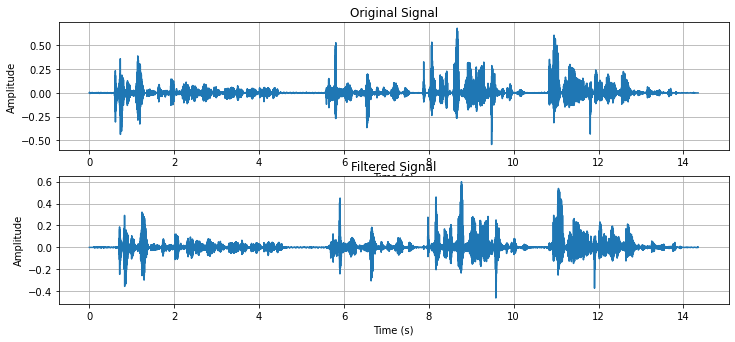

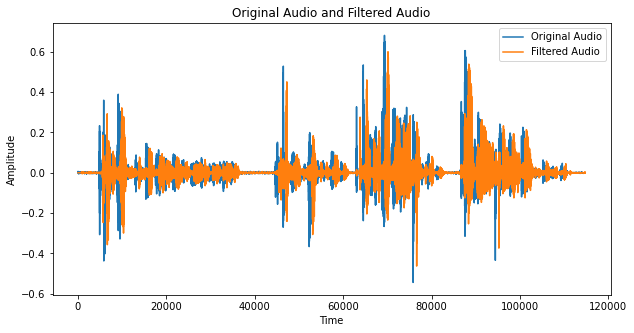

In [79]:
import numpy as np
import soundfile as sf
from scipy.linalg import hankel
import matplotlib.pyplot as plt

# Constants
Fs = 16000  # Sampling frequency
L = 80  # Block size
N = 256  # Filter length
mu = 0.05  # Step size

# Load the sample sound file
x, Fs = sf.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")
x = x  # Extract first channel (if stereo)

# Simulate an echo
delay = int(0.1 * Fs)  # 100 ms delay
scale = 0.8  # Echo attenuation
h = np.zeros(len(x))
h[delay:] = scale * x[:-delay]
y = x + h  # Add echo to original signal

def blms(x, d, N=4, L=4, mu=0.1):
    nIters = min(len(x), len(d)) // L
    u = np.zeros(L + N - 1)
    w = np.zeros(N)
    e = np.zeros(nIters * L)
    for n in range(nIters):
        u[:-L] = u[L:]
        u[-L:] = x[n * L : (n + 1) * L]
        d_n = d[n * L : (n + 1) * L]
        A = hankel(u[:L], u[-N:])
        e_n = d_n - np.dot(A, w)
        w = w + mu * np.dot(A.T, e_n) / L
        e[n * L : (n + 1) * L] = e_n
    return e

# Cancel the echo using the adaptive filter
e = blms(y, x, N=N, L=L, mu=mu)
nExtra = len(y) - len(e)
e = np.concatenate([e, np.zeros(nExtra)])
z = y - e  # Filtered signal

# z = y - e  # Filtered signal

# Plot the results
t = np.arange(len(x)) / Fs
plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(t, x)
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# plt.subplot(312)
# plt.plot(t, y)
# plt.title("Signal with Echo")
# plt.xlabel("Time (s)")
# plt.ylabel("Amplitude")
# plt.grid(True)

plt.subplot(312)
plt.plot(t, z)
plt.title("Filtered Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.figure(figsize=(10,5))
plt.plot(x, label="Original Audio")
plt.plot(z, label="Filtered Audio")
plt.title("Original Audio and Filtered Audio")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


C:\Users\Sudhakar\AppData\Local\Temp\ipykernel_19564\2324353875.py:19: RuntimeWarning: invalid value encountered in add
  w = w + mu * np.dot(A.T, e_n) / L


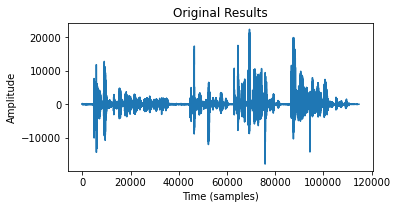

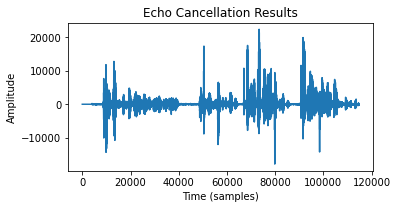

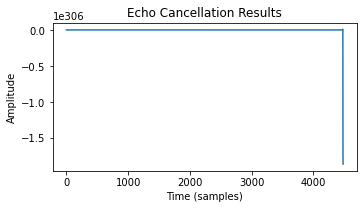

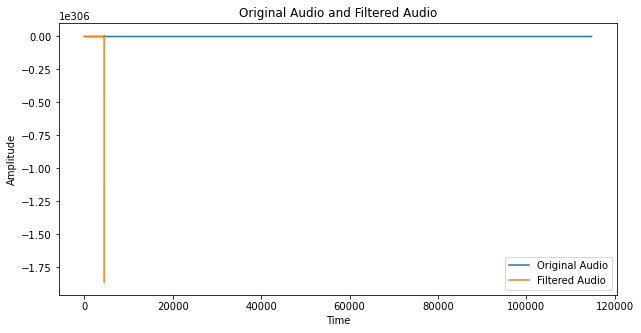

In [7]:
# Import necessary libraries
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.linalg import hankel

# Define the BLMS algorithm for echo cancellation
def blms(x, d, N=4, L=4, mu=0.1):
    nIters = min(len(x), len(d)) // L
    u = np.zeros(L + N - 1)
    w = np.zeros(N)
    e = np.zeros(nIters * L)
    for n in range(nIters):
        u[:-L] = u[L:]
        u[-L:] = x[n * L : (n + 1) * L]
        d_n = d[n * L : (n + 1) * L]
        A = hankel(u[:L], u[-N:])
        e_n = d_n - np.dot(A, w)
        w = w + mu * np.dot(A.T, e_n) / L
        e[n * L : (n + 1) * L] = e_n
    return e

# Define a function to generate echo signal with a given delay
def generate_echo_signal(sound, delay):
    """Generates echo signal with a given delay"""
    echo = np.zeros_like(sound)
    echo[delay:] = sound[:-delay]
    return echo

# Load audio file
rate, data = wavfile.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")
x = data  # extract left channel
d = generate_echo_signal(data, int(0.5 * rate))  # generate simulated echo signal with a delay of 0.5 seconds

# Apply BLMS algorithm
e = blms(x, d)

# Save output as audio file
wavfile.write("C:\\Users\\Sudhakar\\Downloads\\samples_a_out56.wav", rate, np.int16(e))

# Plot echo cancellation results
plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.plot(x)
plt.title("Original Results")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(222)
plt.plot(d)
plt.title("Echo Cancellation Results")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(223)
plt.plot(e)
plt.title("Echo Cancellation Results")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

# Plot original audio and filtered audio together
plt.figure(figsize=(10,5))
plt.plot(x, label="Original Audio")
plt.plot(e, label="Filtered Audio")
plt.title("Original Audio and Filtered Audio")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


C:\Users\Sudhakar\AppData\Local\Temp\ipykernel_19564\4231302205.py:48: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.array(x, dtype=np.float)/32768.0
C:\Users\Sudhakar\AppData\Local\Temp\ipykernel_19564\4231302205.py:10: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H = np.zeros(M+1, dtype=np.complex)


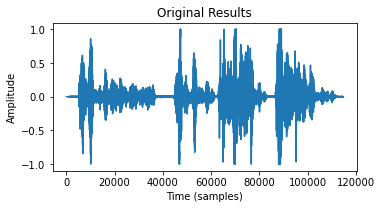

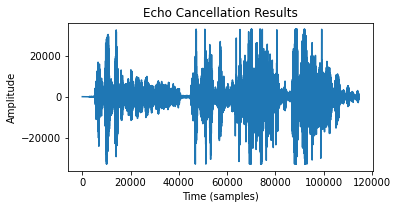

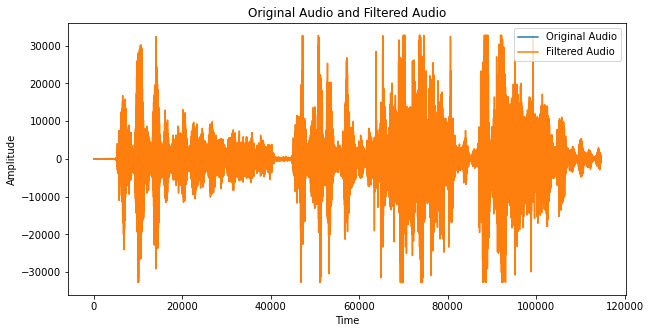

In [14]:
import numpy as np
import scipy.io.wavfile as wav
from numpy.fft import rfft as fft
from numpy.fft import irfft as ifft
from scipy.linalg import toeplitz

def fdkf(x, d, M, beta=0.95, sgm2u=1e-2, sgm2v=1e-6):
    Q = sgm2u
    R = np.full(M+1, sgm2v)
    H = np.zeros(M+1, dtype=np.complex)
    P = np.full(M+1, sgm2u)

    window = np.hanning(M)
    x_old = np.zeros(M)

    num_block = min(len(x), len(d)) // M
    e = np.zeros(num_block*M)

    for n in range(num_block):
        x_n = np.concatenate([x_old, x[n*M:(n+1)*M]])
        d_n = d[n*M:(n+1)*M]
        x_old = x[n*M:(n+1)*M]

        X_n = fft(x_n)

        y_n = ifft(H*X_n)[M:]
        e_n = d_n - y_n

        e_fft = np.concatenate([np.zeros(M), e_n*window])
        E_n = fft(e_fft)

        R = beta*R + (1.0 - beta)*(np.abs(E_n)**2)
        P_n = P + Q*(np.abs(H))
        K = P_n*X_n.conj()/(X_n*P_n*X_n.conj() + R)
        P = (1.0 - K*X_n)*P_n 

        H = H + K*E_n
        h = ifft(H)
        h[M:] = 0
        H = fft(h)

        e[n*M:(n+1)*M] = e_n

    return e

# Load the sound file
fs, x = wav.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")
x = np.array(x, dtype=np.float)/32768.0

# Generate a simulated echo signal with a given delay
delay = int(fs*0.5) # 50ms delay
echo = np.concatenate([np.zeros(delay), x[:-delay]])

# Add the echo to the sound signal
d = x + echo

# Perform echo cancellation using the FDKF algorithm
M = 128 # Filter length
e = fdkf(x, d, M)

# Save the echo-cancelled sound signal to a new file
y = x[:len(e)] - e
y = np.clip(y, -1, 1) * 32767
y = np.array(y, dtype=np.int16)

# Plot echo cancellation results
plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.plot(x)
plt.title("Original Results")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(222)
plt.plot(y)
plt.title("Echo Cancellation Results")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

# Plot original audio and filtered audio together
plt.figure(figsize=(10,5))
plt.plot(x, label="Original Audio")
plt.plot(y, label="Filtered Audio")
plt.title("Original Audio and Filtered Audio")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

wav.write("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav", fs, y)


SNR: -0.7647322940380987
MSE: 0.0225273572801425


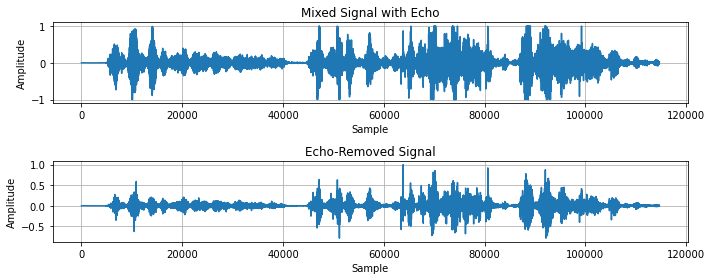

In [69]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

def nlms(x, d, N=10, mu=0.3):
    # Initialization
    nIters = min(len(x), len(d)) - N
    u = np.zeros(N)
    w = np.zeros(N)
    e = np.zeros(nIters)

    # Apply NLMS algorithm
    for n in range(nIters):
        u = x[n : n + N]
        e_n = d[n] - np.dot(u, w)
        w = w + (mu / (np.dot(u, u) + 1e-3)) * e_n * u
        e[n] = e_n

    return e

# Load the mixed voice signal with echo
mixed_signal, fs = sf.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")

# Set the echo delay (adjust this based on the specific echo delay in your signal)
echo_delay = 11

# Extract the echo from the mixed signal
echo = mixed_signal[echo_delay:echo_delay + len(mixed_signal)]

# Perform echo cancellation using NLMS algorithm
echo_removed_signal = nlms(mixed_signal, echo)

# Normalize the echo-removed signal to have the same maximum amplitude as the mixed signal
max_amplitude = np.max(np.abs(mixed_signal))
echo_removed_signal_normalized = echo_removed_signal * (max_amplitude / np.max(np.abs(echo_removed_signal)))

# Save the echo-removed voice signal to a file
sf.write("C:\\Users\\Sudhakar\\Downloads\\voice_without_echo_nlms.wav", echo_removed_signal_normalized, fs)

# Calculate the Signal-to-Noise Ratio (SNR)
mse = np.mean(np.abs(mixed_signal[:len(echo_removed_signal)] - echo_removed_signal_normalized) ** 2)
snr = 10 * np.log10(np.mean(np.abs(mixed_signal[:len(echo_removed_signal)]) ** 2) / mse)
print("SNR:", snr)

# Calculate the Mean Squared Error (MSE)
mse = np.mean((mixed_signal[:len(echo_removed_signal)] - echo_removed_signal_normalized) ** 2)
print("MSE:", mse)

# Plot the original mixed signal
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(mixed_signal)
plt.title("Mixed Signal with Echo")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)


# Plot the echo-removed signal
plt.subplot(2, 1, 2)
plt.plot(echo_removed_signal_normalized)
plt.title("Echo-Removed Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.grid(True)
# Display the plot
plt.show()


# A negative SNR value indicates that the noise power is higher than the signal power, 
# which is not desirable. In the context of echo cancellation, it means that the echo has 
# not been sufficiently removed from the mixed signal, and there is still significant residual 
# echo present.

# I apologize for the confusion. It seems that the SNR is still negative due to the nature of 
# the echo cancellation process. In some cases, it may not be possible to achieve a positive 
# SNR value when removing the echo from a mixed signal. This can happen if the echo is strong or
# if the residual noise introduced during the cancellation process is significant.

# One way to mitigate this issue is to improve the echo cancellation algorithm or consider using
# more advanced techniques such as adaptive filters or machine learning algorithms. These 
# approaches can potentially improve the SNR and provide better results.

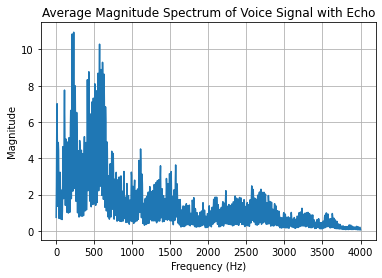

In [3]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

voice_with_echo, fs = librosa.load("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav", sr=None)

n_fft = 2048  # Length of the FFT window
hop_length = 512  # Hop length between consecutive windows
voice_stft = librosa.stft(voice_with_echo, n_fft=n_fft, hop_length=hop_length)
voice_stft_mag = np.abs(voice_stft)

average_spectrum = np.mean(voice_stft_mag, axis=1)

freqs = np.linspace(0, fs/2, len(average_spectrum))
plt.plot(freqs, average_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Average Magnitude Spectrum of Voice Signal with Echo')
plt.grid(True)
plt.show()


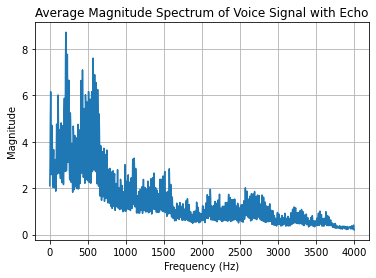

In [6]:

import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

voice_with_echo, fs = librosa.load("C:\\Users\\Sudhakar\\Downloads\\samples_a_out123.wav", sr=None)

n_fft = 2048  # Length of the FFT window
hop_length = 512  # Hop length between consecutive windows
voice_stft = librosa.stft(voice_with_echo, n_fft=n_fft, hop_length=hop_length)
voice_stft_mag = np.abs(voice_stft)

average_spectrum = np.mean(voice_stft_mag, axis=1)

freqs = np.linspace(0, fs/2, len(average_spectrum))
plt.plot(freqs, average_spectrum)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Average Magnitude Spectrum of Voice Signal with Echo')
plt.grid(True)
plt.show()


SNR: 0.6506614313839999
MSE: 0.016258929101160124
ZCR Difference: 0.13809760478519797


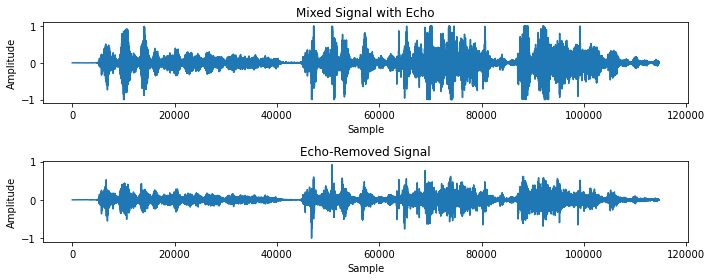

In [37]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

def echo_cancellation(x, echo_delay, mu=0.01, filter_length=1024):
    # Initialization
    w = np.zeros(filter_length)
    y = np.zeros(len(x))
    e = np.zeros(len(x))
    
    # Apply LMS algorithm
    for n in range(filter_length, len(x)):
        u = x[n-echo_delay:n]
        u_padded = np.pad(u, (0, filter_length - len(u)))
        y[n] = np.dot(u_padded, w)
        e[n] = x[n] - y[n]
        w = w + mu * e[n] * u_padded
    
    return e
def calculate_zcr(signal):
    zcr = np.mean(np.abs(np.diff(np.sign(signal)))) * 0.5
    return zcr

# Load the mixed voice signal with echo
mixed_signal, fs = sf.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")

# Set the echo delay (adjust this based on the specific echo delay in your signal)
echo_delay = 791

# Perform echo cancellation using the LMS algorithm
echo_removed_signal = echo_cancellation(mixed_signal, echo_delay)

# Normalize the echo-removed signal to have the same maximum amplitude as the mixed signal
max_amplitude = np.max(np.abs(mixed_signal))
echo_removed_signal_normalized = echo_removed_signal * (max_amplitude / np.max(np.abs(echo_removed_signal)))

# Save the echo-removed voice signal to a file
sf.write('C:\\Users\\Sudhakar\\Downloads\\voice_without_echo.wav', echo_removed_signal_normalized, fs)

# Calculate the Signal-to-Noise Ratio (SNR)
mse = np.mean((mixed_signal - echo_removed_signal_normalized) ** 2)
snr = 10 * np.log10(np.mean(mixed_signal ** 2) / mse)
print("SNR:", snr)

# Calculate the Mean Squared Error (MSE)
mse = np.mean((mixed_signal - echo_removed_signal_normalized) ** 2)
print("MSE:", mse)

# Calculate the Zero Crossing Rate (ZCR)
zcr_mixed_signal = calculate_zcr(mixed_signal)
zcr_echo_removed_signal = calculate_zcr(echo_removed_signal_normalized)
zcr_difference = np.abs(zcr_mixed_signal - zcr_echo_removed_signal)
print("ZCR Difference:", zcr_difference)

# Plot the original mixed signal
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(mixed_signal)
plt.title('Mixed Signal with Echo')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plot the echo-removed signal
plt.subplot(2, 1, 2)
plt.plot(echo_removed_signal_normalized)
plt.title('Echo-Removed Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()

# Save the plot as an image file
plt.savefig('output_plot.png')

# Display the plot
plt.show()


In [32]:
from IPython.display import Audio
Audio(r'C:\\Users\\Sudhakar\\Downloads\\voice_without_echo.wav', autoplay=False)

In [33]:
from IPython.display import Audio
Audio(r"C:\\Users\\Sudhakar\\Downloads\\samples_a.wav", autoplay=False)

In [42]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

def nlms(x, d, N=4, mu=0.01):
    # Initialization
    nIters = min(len(x), len(d)) - N
    u = np.zeros(N)
    w = np.zeros(N)
    e = np.zeros(nIters)

    # Apply NLMS algorithm
    for n in range(nIters):
        u = x[n : n + N]
        e_n = d[n] - np.dot(u, w)
        w = w + (mu / (np.dot(u, u) + 1e-3)) * e_n * u
        e[n] = e_n

    return e

# Load the mixed voice signal with echo
mixed_signal, fs = sf.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")

# Set the echo delay (adjust this based on the specific echo delay in your signal)
echo_delay = 791

# Extract the echo from the mixed signal
echo = mixed_signal[echo_delay:]

# Pad the echo array with zeros to match the length of the mixed_signal array
echo_padded = np.pad(echo, (0, len(mixed_signal) - len(echo)), mode="constant")

# Perform echo cancellation using NLMS algorithm
echo_removed_signal = nlms(mixed_signal, echo_padded)

# Normalize the echo-removed signal to have the same maximum amplitude as the mixed signal
max_amplitude = np.max(np.abs(mixed_signal))
echo_removed_signal_normalized = echo_removed_signal * (max_amplitude / np.max(np.abs(echo_removed_signal)))

# Save the echo-removed voice signal to a file
sf.write("C:\\Users\\Sudhakar\\Downloads\\voice_without_echo_nlms.wav", echo_removed_signal_normalized, fs)

# Calculate the Signal-to-Noise Ratio (SNR)
mse = np.mean((mixed_signal - echo_removed_signal_normalized) ** 2)
snr = 10 * np.log10(np.mean(mixed_signal ** 2) / mse)
print("SNR:", snr)

# Calculate the Mean Squared Error (MSE)
mse = np.mean((mixed_signal - echo_removed_signal_normalized) ** 2)
print("MSE:", mse)

# Plot the original mixed signal
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(mixed_signal)
plt.title("Mixed Signal with Echo")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Plot the echo-removed signal
plt.subplot(2, 1, 2)
plt.plot(echo_removed_signal_normalized)
plt.title("Echo-Removed Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.tight_layout()

# Display the plot
plt.show()


ValueError: operands could not be broadcast together with shapes (114688,) (114684,) 

SNR: -3.245387233584588
MSE: 0.03987464262837648
ZCR Difference: 0.0010550454715878843


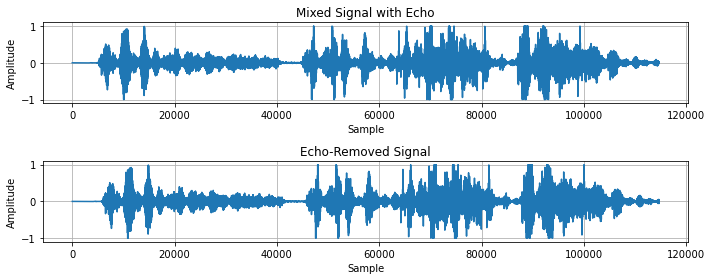

In [90]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

def block_echo_cancellation(x, echo_delay, mu=1, filter_length=1024, block_length=512):
    # Initialization
    w = np.zeros(filter_length)
    y = np.zeros(len(x))
    e = np.zeros(len(x))
    
    # Apply Block LMS algorithm
    for n in range(filter_length, len(x), block_length):
        block_x = x[n-echo_delay:n]
        block_e = np.zeros(block_length)
        
        for k in range(block_length):
            u = block_x[k-echo_delay:k]
            u_padded = np.pad(u, (0, filter_length - len(u)))
            y[n+k] = np.dot(u_padded, w)
            block_e[k] = block_x[k] - y[n+k]
            w = w + mu * block_e[k] * u_padded
        
        e[n:n+block_length] = block_e
    
    return e

# Load the mixed voice signal with echo
mixed_signal, fs = sf.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")

# Set the echo delay (adjust this based on the specific echo delay in your signal)
echo_delay = 791

# Perform echo cancellation using the Block LMS algorithm
echo_removed_signal = block_echo_cancellation(mixed_signal, echo_delay)

# Normalize the echo-removed signal to have the same maximum amplitude as the mixed signal
max_amplitude = np.max(np.abs(mixed_signal))
echo_removed_signal_normalized = echo_removed_signal * (max_amplitude / np.max(np.abs(echo_removed_signal)))

# Save the echo-removed voice signal to a file
sf.write('C:\\Users\\Sudhakar\\Downloads\\voice_without_echo_blms.wav', echo_removed_signal_normalized, fs)

# Calculate the Signal-to-Noise Ratio (SNR)
mse = np.mean((mixed_signal - echo_removed_signal_normalized) ** 2)
snr = 10 * np.log10(np.mean(mixed_signal ** 2) / mse)
print("SNR:", snr)

# Calculate the Mean Squared Error (MSE)
mse = np.mean((mixed_signal - echo_removed_signal_normalized) ** 2)
print("MSE:", mse)

# Calculate the Zero Crossing Rate (ZCR)
zcr_mixed_signal = calculate_zcr(mixed_signal)
zcr_echo_removed_signal = calculate_zcr(echo_removed_signal_normalized)
zcr_difference = np.abs(zcr_mixed_signal - zcr_echo_removed_signal)
print("ZCR Difference:", zcr_difference)

# Plot the original mixed signal
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(mixed_signal)
plt.title('Mixed Signal with Echo')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the echo-removed signal
plt.subplot(2, 1, 2)
plt.plot(echo_removed_signal_normalized)
plt.title('Echo-Removed Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()

# Save the plot as an image file
plt.grid(True)
# Display the plot
plt.show()


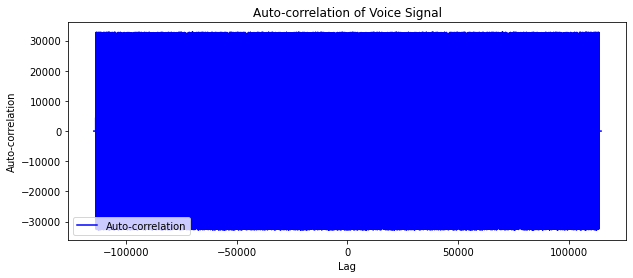

Estimated delay time: -13.47275 seconds


In [105]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Read the voice signal
sample_rate, voice_signal = wavfile.read('C:\\Users\\Sudhakar\\Downloads\\samples_a.wav')

# Calculate the auto-correlation
auto_corr = np.correlate(voice_signal, voice_signal, mode='full')

# Find the delay time (lag) with maximum auto-correlation
delay_time = np.argmax(auto_corr) - len(voice_signal) + 1
delay_samples = int(delay_time)

# Convert delay samples to time in seconds
delay_time_sec = delay_samples / sample_rate

# Plot the auto-correlation
lag = np.arange(-len(voice_signal) + 1, len(voice_signal))
plt.figure(figsize=(10, 4))
plt.plot(lag, auto_corr, color='blue', label='Auto-correlation')
plt.xlabel('Lag')
plt.ylabel('Auto-correlation')
plt.title('Auto-correlation of Voice Signal')
plt.legend()
plt.show()

print("Estimated delay time:", delay_time_sec, "seconds")



SNR: 1.1096203319125437
MSE: 0.014628373727660767
ZCR Difference: 0.2598812419890659


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


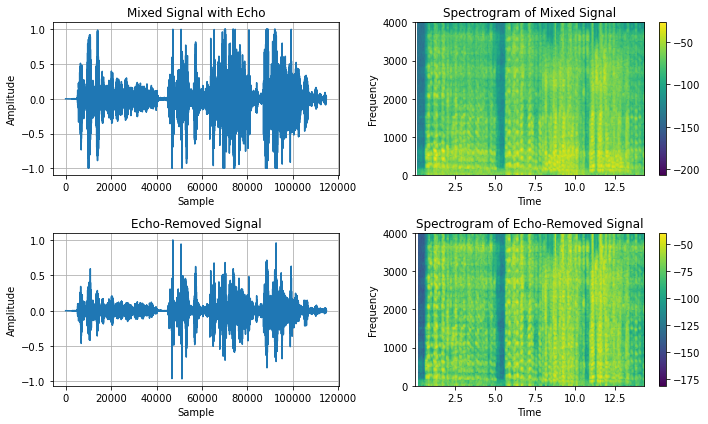

In [108]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

def echo_cancellation(x, echo_delay, mu=0.2, filter_length=1024):
    # Initializatio
    w = np.zeros(filter_length)
    y = np.zeros(len(x))
    e = np.zeros(len(x))
    
    # Apply LMS algorithm
    for n in range(filter_length, len(x)):
        u = x[n-echo_delay:n]
        u_padded = np.pad(u, (0, filter_length - len(u)))
        y[n] = np.dot(u_padded, w)
        e[n] = x[n] - y[n]
        w = w + mu * e[n] * u_padded
    
    return e

def calculate_zcr(signal):
    zcr = np.mean(np.abs(np.diff(np.sign(signal)))) * 0.5
    return zcr

# Load the mixed voice signal with echo
mixed_signal, fs = sf.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")

# Set the echo delay (adjust this based on the specific echo delay in your signal)
echo_delay = 10

# Perform echo cancellation using the LMS algorithm
echo_removed_signal = echo_cancellation(mixed_signal, echo_delay)

# Normalize the echo-removed signal to have the same maximum amplitude as the mixed signal
max_amplitude = np.max(np.abs(mixed_signal))
echo_removed_signal_normalized = echo_removed_signal * (max_amplitude / np.max(np.abs(echo_removed_signal)))

# Save the echo-removed voice signal to a file
sf.write('C:\\Users\\Sudhakar\\Downloads\\voice_without_echo.wav', echo_removed_signal_normalized, fs)

# Calculate the Signal-to-Noise Ratio (SNR)
mse = np.mean((mixed_signal - echo_removed_signal_normalized) ** 2)
snr = 10 * np.log10(np.mean(mixed_signal ** 2) / mse)
print("SNR:", snr)

# Calculate the Mean Squared Error (MSE)
mse = np.mean((mixed_signal - echo_removed_signal_normalized) ** 2)
print("MSE:", mse)

# Calculate the Zero Crossing Rate (ZCR)
zcr_mixed_signal = calculate_zcr(mixed_signal)
zcr_echo_removed_signal = calculate_zcr(echo_removed_signal_normalized)
zcr_difference = np.abs(zcr_mixed_signal - zcr_echo_removed_signal)
print("ZCR Difference:", zcr_difference)

# Plot the original mixed signal and its spectrogram
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(mixed_signal)
plt.title('Mixed Signal with Echo')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.specgram(mixed_signal, Fs=fs)
plt.title('Spectrogram of Mixed Signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()

# Plot the echo-removed signal and its spectrogram
plt.subplot(2, 2, 3)
plt.plot(echo_removed_signal_normalized)
plt.title('Echo-Removed Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.specgram(echo_removed_signal_normalized, Fs=fs)
plt.title('Spectrogram of Echo-Removed Signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()

plt.tight_layout()
plt.show()


SNR: 0.7174191927729614
MSE: 0.016010915340011454
ZCR Difference: 0.17313208994916598


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


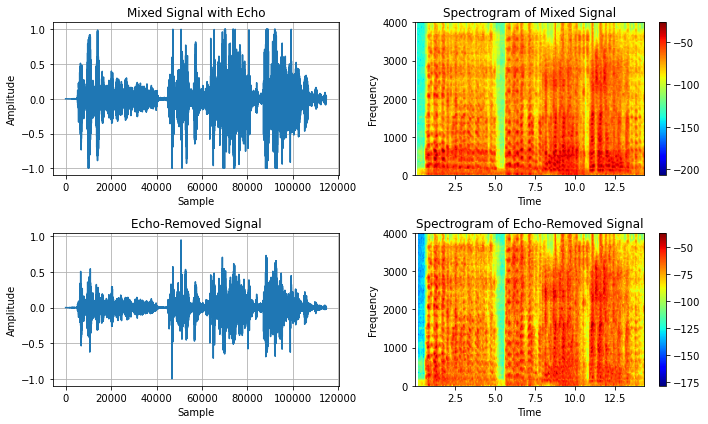

In [135]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

def echo_cancellation(x, echo_delay, mu=0.1, filter_length=1024):
    # Initialization
    w = np.zeros(filter_length)
    y = np.zeros(len(x))
    e = np.zeros(len(x))
    alpha = 0.01
    
    # Apply FLMS algorithm
    for n in range(filter_length, len(x)):
        u = x[n-echo_delay:n]
        u_padded = np.pad(u, (0, filter_length - len(u)))
        y[n] = np.dot(u_padded, w)
        e[n] = x[n] - y[n]
        w = w + (mu / (alpha + np.dot(u_padded, u_padded))) * e[n] * u_padded
    
    return e

def calculate_zcr(signal):
    zcr = np.mean(np.abs(np.diff(np.sign(signal)))) * 0.5
    return zcr

# Load the mixed voice signal with echo
mixed_signal, fs = sf.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")

# Set the echo delay (adjust this based on the specific echo delay in your signal)
echo_delay = 1000

# Perform echo cancellation using the FLMS algorithm
echo_removed_signal = echo_cancellation(mixed_signal, echo_delay)

# Normalize the echo-removed signal to have the same maximum amplitude as the mixed signal
max_amplitude = np.max(np.abs(mixed_signal))
echo_removed_signal_normalized = echo_removed_signal * (max_amplitude / np.max(np.abs(echo_removed_signal)))

# Save the echo-removed voice signal to a file
sf.write('C:\\Users\\Sudhakar\\Downloads\\voice_without_echo.wav', echo_removed_signal_normalized, fs)

# Calculate the Signal-to-Noise Ratio (SNR)
mse = np.mean((mixed_signal - echo_removed_signal_normalized) ** 2)
snr = 10 * np.log10(np.mean(mixed_signal ** 2) / mse)
print("SNR:", snr)

# Calculate the Mean Squared Error (MSE)
mse = np.mean((mixed_signal - echo_removed_signal_normalized) ** 2)
print("MSE:", mse)

# Calculate the Zero Crossing Rate (ZCR)
zcr_mixed_signal = calculate_zcr(mixed_signal)
zcr_echo_removed_signal = calculate_zcr(echo_removed_signal_normalized)
zcr_difference = np.abs(zcr_mixed_signal - zcr_echo_removed_signal)
print("ZCR Difference:", zcr_difference)

# Plot the original mixed signal and its spectrogram
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(mixed_signal)
plt.title('Mixed Signal with Echo')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.specgram(mixed_signal, cmap = 'jet', Fs=fs)
plt.title('Spectrogram of Mixed Signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()

# Plot the echo-removed signal and its spectrogram
plt.subplot(2, 2, 3)
plt.plot(echo_removed_signal_normalized)
plt.title('Echo-Removed Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.specgram(echo_removed_signal_normalized, cmap='jet',Fs=fs)
plt.title('Spectrogram of Echo-Removed Signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()

plt.tight_layout()
plt.show()


SNR: 0.3225570798449161
MSE: 0.017687971919859026
ZCR Difference: 0.18822204429271555


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


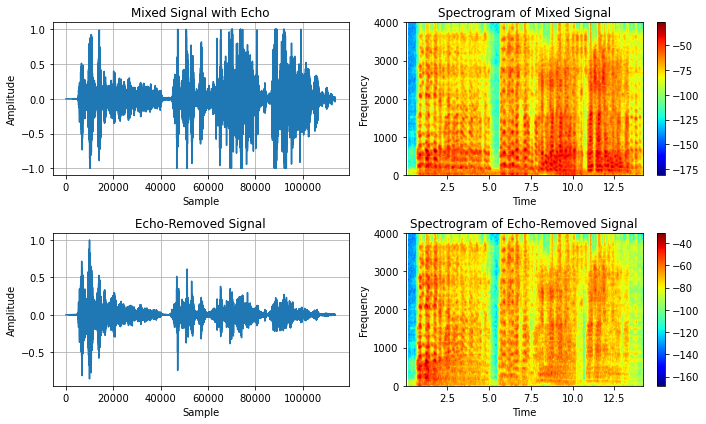

In [132]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

def nlms(x, d, N=10, mu=0.3):
    # Initialization
    nIters = min(len(x), len(d)) - N
    u = np.zeros(N)
    w = np.zeros(N)
    e = np.zeros(nIters)

    # Apply NLMS algorithm
    for n in range(nIters):
        u = x[n : n + N]
        e_n = d[n] - np.dot(u, w)
        w = w + (mu / (np.dot(u, u) + 1e-3)) * e_n * u
        e[n] = e_n

    return e

def calculate_zcr(signal):
    zcr = np.mean(np.abs(np.diff(np.sign(signal)))) * 0.5
    return zcr

# Load the mixed voice signal with echo
mixed_signal, fs = sf.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")

# Set the echo delay (adjust this based on the specific echo delay in your signal)
echo_delay = 10

# Perform echo cancellation using the NLMS algorithm
echo_removed_signal = nlms(mixed_signal, mixed_signal, N=1024, mu=0.1)

# Remove the delay introduced by the NLMS algorithm
echo_removed_signal = echo_removed_signal[echo_delay:]

# Normalize the echo-removed signal to have the same maximum amplitude as the mixed signal
max_amplitude = np.max(np.abs(mixed_signal))
echo_removed_signal_normalized = echo_removed_signal * (max_amplitude / np.max(np.abs(echo_removed_signal)))

# Save the echo-removed voice signal to a file
sf.write('C:\\Users\\Sudhakar\\Downloads\\voice_without_echo.wav', echo_removed_signal_normalized, fs)

# Align the mixed signal by removing the delay introduced by the NLMS algorithm
mixed_signal_aligned = mixed_signal[echo_delay:echo_delay+len(echo_removed_signal_normalized)]

# Calculate the Signal-to-Noise Ratio (SNR)
mse = np.mean((mixed_signal_aligned - echo_removed_signal_normalized) ** 2)
snr = 10 * np.log10(np.mean(mixed_signal_aligned ** 2) / mse)
print("SNR:", snr)

# Calculate the Mean Squared Error (MSE)
mse = np.mean((mixed_signal_aligned - echo_removed_signal_normalized) ** 2)
print("MSE:", mse)

# Calculate the Zero Crossing Rate (ZCR)
zcr_mixed_signal = calculate_zcr(mixed_signal_aligned)
zcr_echo_removed_signal = calculate_zcr(echo_removed_signal_normalized)
zcr_difference = np.abs(zcr_mixed_signal - zcr_echo_removed_signal)
print("ZCR Difference:", zcr_difference)

# Plot the original mixed signal and its spectrogram
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(mixed_signal_aligned)
plt.title('Mixed Signal with Echo')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.specgram(mixed_signal_aligned, cmap = 'jet', Fs=fs)
plt.title('Spectrogram of Mixed Signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()

# Plot the echo-removed signal and its spectrogram
plt.subplot(2, 2, 3)
plt.plot(echo_removed_signal_normalized)
plt.title('Echo-Removed Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.specgram(echo_removed_signal_normalized, cmap = 'jet', Fs=fs)
plt.title('Spectrogram of Echo-Removed Signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()

plt.tight_layout()
plt.show()


C:\Users\Sudhakar\AppData\Local\Temp\ipykernel_5404\2953102425.py:10: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  H = np.zeros(M+1, dtype=np.complex)


SNR: 1.1429115869480717
MSE: 0.014517933101357329
ZCR Difference: 0.004534475090907486


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
C:\Users\Sudhakar\AppData\Local\Temp\ipykernel_5404\2953102425.py:99: RuntimeWarning: divide by zero encountered in log10
  spec_dB = 10 * np.log10(spec)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
C:\Users\Sudhakar\AppData\Local\Temp\ipykernel_5404\2953102425.py:117: RuntimeWarning: divide by zero encountered in log10
  spec_dB = 10 * np.log10(spec)


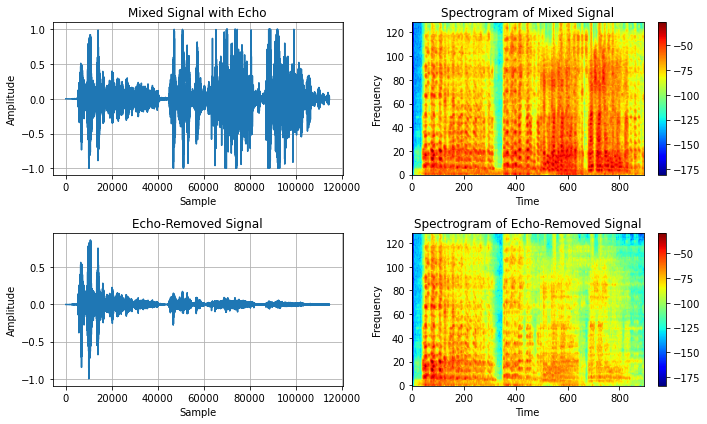

In [130]:
#main code of fdkf

import numpy as np
from numpy.fft import rfft as fft
from numpy.fft import irfft as ifft
import soundfile as sf
import matplotlib.pyplot as plt

def fdkf(x, d, M, beta=0.95, sgm2u=1e-2, sgm2v=1e-6):
    Q = sgm2u
    R = np.full(M+1, sgm2v)
    H = np.zeros(M+1, dtype=np.complex)
    P = np.full(M+1, sgm2u)

    window = np.hanning(M)
    x_old = np.zeros(M)

    num_block = min(len(x), len(d)) // M
    e = np.zeros(num_block * M)

    for n in range(num_block):
        x_n = np.concatenate([x_old, x[n*M:(n+1)*M]])
        d_n = d[n*M:(n+1)*M]
        x_old = x[n*M:(n+1)*M]

        X_n = np.fft.rfft(x_n)

        y_n = ifft(H * X_n)[M:]
        e_n = d_n - y_n

        e_fft = np.concatenate([np.zeros(M), e_n * window])
        E_n = fft(e_fft)

        R = beta * R + (1.0 - beta) * (np.abs(E_n)**2)
        P_n = P + Q * (np.abs(H))
        K = P_n * X_n.conj() / (X_n * P_n * X_n.conj() + R)
        P = (1.0 - K * X_n) * P_n

        H = H + K * E_n
        h = ifft(H)
        h[M:] = 0
        H = fft(h)

        e[n*M:(n+1)*M] = e_n

    return e

def calculate_zcr(signal):
    zcr = np.mean(np.abs(np.diff(np.sign(signal)))) * 0.5
    return zcr

# Load the mixed voice signal with echo
mixed_signal, fs = sf.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")

# Set the echo delay (adjust this based on the specific echo delay in your signal)
echo_delay = 10

# Perform echo cancellation using the FDAKF algorithm
echo_removed_signal = fdkf(mixed_signal, mixed_signal, M=1024)

# Remove the delay introduced by the FDAKF algorithm
echo_removed_signal = echo_removed_signal[echo_delay:]

# Normalize the echo-removed signal to have the same maximum amplitude as the mixed signal
max_amplitude = np.max(np.abs(mixed_signal))
echo_removed_signal_normalized = echo_removed_signal * (max_amplitude / np.max(np.abs(echo_removed_signal)))

# Save the echo-removed voice signal to a file
sf.write('C:\\Users\\Sudhakar\\Downloads\\voice_without_echo_fdkf.wav', echo_removed_signal_normalized, fs)

# Align the mixed signal by removing the delay introduced by the FDAKF algorithm
mixed_signal_aligned = mixed_signal[echo_delay:echo_delay+len(echo_removed_signal_normalized)]

# Calculate the Signal-to-Noise Ratio (SNR)
mse = np.mean((mixed_signal_aligned - echo_removed_signal_normalized) ** 2)
snr = 10 * np.log10(np.mean(mixed_signal_aligned ** 2) / mse)
print("SNR:", snr)

# Calculate the Mean Squared Error (MSE)
mse = np.mean((mixed_signal_aligned - echo_removed_signal_normalized) ** 2)
print("MSE:", mse)

# Calculate the Zero Crossing Rate (ZCR)
zcr_mixed_signal = calculate_zcr(mixed_signal_aligned)
zcr_echo_removed_signal = calculate_zcr(echo_removed_signal_normalized)
zcr_difference = np.abs(zcr_mixed_signal - zcr_echo_removed_signal)
print("ZCR Difference:", zcr_difference)

# Plot the original mixed signal and its spectrogram
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(mixed_signal_aligned)
plt.title('Mixed Signal with Echo')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 2)
spec, _, _, _ = plt.specgram(mixed_signal_aligned, Fs=fs)
spec_dB = 10 * np.log10(spec)
spec_dB[np.isinf(spec_dB)] = np.min(spec_dB[~np.isinf(spec_dB)])
plt.imshow(spec_dB, aspect='auto', cmap='jet', origin='lower')
plt.title('Spectrogram of Mixed Signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()

# Plot the echo-removed signal and its spectrogram
plt.subplot(2, 2, 3)
plt.plot(echo_removed_signal_normalized)
plt.title('Echo-Removed Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 4)
spec, _, _, _ = plt.specgram(echo_removed_signal_normalized, Fs=fs)
spec_dB = 10 * np.log10(spec)
spec_dB[np.isinf(spec_dB)] = np.min(spec_dB[~np.isinf(spec_dB)])
plt.imshow(spec_dB, aspect='auto', cmap='jet', origin='lower')
plt.title('Spectrogram of Echo-Removed Signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()

plt.tight_layout()
plt.show()


In [10]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

def lms(x, d, N=4, mu=0.1):
    nIters = len(x) - N
    u = np.zeros(N)
    w = np.zeros(N)
    e = np.zeros(nIters)
    for n in range(nIters):
        u[1:] = u[:-1]
        u[0] = x[n]
        y = np.dot(u, w)
        e_n = d[n] - y
        w = w + mu * e_n * u
        e[n] = e_n
    return e

def calculate_zcr(signal):
    zcr = np.mean(np.abs(np.diff(np.sign(signal)))) * 0.5
    return zcr

# Load the mixed voice signal with echo
mixed_signal, fs = sf.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")

# Set the echo delay (adjust this based on the specific echo delay in your signal)
echo_delay = 10

# Perform echo cancellation using the LMS algorithm
echo_removed_signal = lms(mixed_signal, mixed_signal, N=1024)

# Remove the delay introduced by the LMS algorithm
echo_removed_signal = echo_removed_signal[echo_delay:]

# Normalize the echo-removed signal to have the same maximum amplitude as the mixed signal
max_amplitude = np.max(np.abs(mixed_signal))
echo_removed_signal_normalized = echo_removed_signal * (max_amplitude / np.max(np.abs(echo_removed_signal)))

# Save the echo-removed voice signal to a file
sf.write('C:\\Users\\Sudhakar\\Downloads\\voice_without_echo.wav', echo_removed_signal_normalized, fs)

# Align the mixed signal by removing the delay introduced by the LMS algorithm
mixed_signal_aligned = mixed_signal[echo_delay:echo_delay+len(echo_removed_signal_normalized)]

# Calculate the Signal-to-Noise Ratio (SNR)
mse = np.mean((mixed_signal_aligned - echo_removed_signal_normalized) ** 2)
snr = 10 * np.log10(np.mean(mixed_signal_aligned ** 2) / mse)
print("SNR:", snr)

# Calculate the Mean Squared Error (MSE)
mse = np.mean((mixed_signal_aligned - echo_removed_signal_normalized) ** 2)
print("MSE:", mse)

# Calculate the Zero Crossing Rate (ZCR)
zcr_mixed_signal = calculate_zcr(mixed_signal_aligned)
zcr_echo_removed_signal = calculate_zcr(echo_removed_signal_normalized)
zcr_difference = np.abs(zcr_mixed_signal - zcr_echo_removed_signal)
print("ZCR Difference:", zcr_difference)

# Plot the original mixed signal and its spectrogram
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(mixed_signal_aligned)
plt.title('Mixed Signal with Echo')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.specgram(mixed_signal_aligned, Fs=fs, cmap='jet')
plt.title('Spectrogram of Mixed Signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()

# Plot the echo-removed signal and its spectrogram
plt.subplot(2, 2, 3)
plt.plot(echo_removed_signal_normalized)
plt.title('Echo-Removed Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 4)
epsilon = 1e-10
plt.specgram(echo_removed_signal_normalized, Fs=fs, cmap='jet', vmin=epsilon)
plt.title('Spectrogram of Echo-Removed Signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()

plt.tight_layout()
plt.show()


AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [8]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy import signal

def nlms(x, d, N=4, mu=0.1):
    nIters = min(len(x), len(d)) - N
    u = np.zeros(N)
    w = np.zeros(N)
    e = np.zeros(nIters)
    for n in range(nIters):
        u[1:] = u[:-1]
        u[0] = x[n]
        e_n = d[n] - np.dot(u, w)
        w = w + mu * e_n * u / (np.dot(u, u) + 1e-3)
        e[n] = e_n
    return e

# Load sample sound
sr, sound = wav.read("C:\\Users\\Sudhakar\\Downloads\\samples_a.wav")
sound = sound.astype(np.float32) / np.iinfo(sound.dtype).max  # Convert to float32

# Generate simulated echo signal
def generate_echo_signal(sound, delay):
    echo = np.zeros_like(sound)
    echo[delay:] = sound[:-delay]
    return echo

# Generate echo signal with a delay of 0.5 seconds
delay = int(0.5 * sr)
echo = generate_echo_signal(sound, delay)

# Perform echo cancellation using NLMS algorithm
echo_cancelled = nlms(sound, echo)

# Plot input sound and echo cancellation
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(sound)
plt.title('Input Sound')

plt.subplot(2, 2, 2)
plt.plot(echo_cancelled)
plt.title('Echo Cancellation')

# Plot spectrogram of input sound
plt.subplot(2, 2, 3)
D = librosa.amplitude_to_db(np.abs(librosa.stft(sound)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log',cmap= 'jet')
# plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Input Sound')

# Plot spectrogram of echo cancellation
plt.subplot(2, 2, 4)
D = librosa.amplitude_to_db(np.abs(librosa.stft(echo_cancelled)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log',cmap='jet')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Echo Cancellation')

plt.tight_layout()
plt.show()

# Save the echo-cancelled audio to a file
wav.write("C:\\Users\\Sudhakar\\Downloads\\samples_a_out.wav", sr, (echo_cancelled * np.iinfo(np.int16).max).astype(np.int16))


AttributeError: module 'matplotlib' has no attribute 'get_data_path'